In [10]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression

In [11]:
car_df = pd.read_csv('data/imports-85.data',names=['symboling','normalized_losses','make','fuel_type','aspiration','num_of_doors','body_style','drive_wheels','engine_location','wheel_base','length','width','height','curb_weight','engine_type','num_of_cylinders','engine_size','fuel_system','bore','stroke','compression_ratio','horsepower','peak_rpm','city_mpg','highway_mpg','price'])
car_df.head(2).transpose()

,0,1
symboling,3,3
normalized_losses,?,?
make,alfa-romero,alfa-romero
fuel_type,gas,gas
aspiration,std,std
num_of_doors,two,two
body_style,convertible,convertible
drive_wheels,rwd,rwd
engine_location,front,front
wheel_base,88.6,88.6


In [12]:
car_df.dtypes

symboling              int64
normalized_losses     object
make                  object
fuel_type             object
aspiration            object
num_of_doors          object
body_style            object
drive_wheels          object
engine_location       object
wheel_base           float64
length               float64
width                float64
height               float64
curb_weight            int64
engine_type           object
num_of_cylinders      object
engine_size            int64
fuel_system           object
bore                  object
stroke                object
compression_ratio    float64
horsepower            object
peak_rpm              object
city_mpg               int64
highway_mpg            int64
price                 object
dtype: object

In [13]:
car_df = car_df.drop(['make','fuel_type','engine_location','num_of_doors','body_style','drive_wheels','engine_type','fuel_system','aspiration','normalized_losses'],axis=1)

In [14]:
car_df.dtypes

symboling              int64
wheel_base           float64
length               float64
width                float64
height               float64
curb_weight            int64
num_of_cylinders      object
engine_size            int64
bore                  object
stroke                object
compression_ratio    float64
horsepower            object
peak_rpm              object
city_mpg               int64
highway_mpg            int64
price                 object
dtype: object

In [15]:
car_df['cylinder'] = car_df['num_of_cylinders'].replace({'one':1,'two':2,'three':3,'four':4,'five':5,'six':6,'seven':7,'eight':8,'nine':9,'twelve':12})

In [16]:
car_df = car_df.replace('?',np.nan)

In [17]:
car_df['bore'] = car_df['bore'].astype('float64')
car_df['stroke'] = car_df['stroke'].astype('float64')
car_df['horsepower'] = car_df['horsepower'].astype('float64')
car_df['peak_rpm'] = car_df['peak_rpm'].astype('float64')
car_df['price'] = car_df['price'].astype('float64')

car_df['price'] = car_df['price'].fillna(car_df['price'].median())
car_df['bore'] = car_df['bore'].fillna(car_df['bore'].median())
car_df['horsepower'] = car_df['horsepower'].fillna(car_df['horsepower'].median())
car_df['peak_rpm'] = car_df['peak_rpm'].fillna(car_df['peak_rpm'].median())
car_df['stroke'] = car_df['stroke'].fillna(car_df['stroke'].median())
car_df['cylinder'] = car_df['cylinder'].fillna(car_df['cylinder'].median())
car_df

,symboling,wheel_base,length,width,height,curb_weight,num_of_cylinders,engine_size,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price,cylinder
0,3,88.6,168.8,64.1,48.8,2548,four,130,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0,4
1,3,88.6,168.8,64.1,48.8,2548,four,130,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0,4
2,1,94.5,171.2,65.5,52.4,2823,six,152,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0,6
3,2,99.8,176.6,66.2,54.3,2337,four,109,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0,4
4,2,99.4,176.6,66.4,54.3,2824,five,136,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,109.1,188.8,68.9,55.5,2952,four,141,3.78,3.15,9.5,114.0,5400.0,23,28,16845.0,4
201,-1,109.1,188.8,68.8,55.5,3049,four,141,3.78,3.15,8.7,160.0,5300.0,19,25,19045.0,4
202,-1,109.1,188.8,68.9,55.5,3012,six,173,3.58,2.87,8.8,134.0,5500.0,18,23,21485.0,6
203,-1,109.1,188.8,68.9,55.5,3217,six,145,3.01,3.40,23.0,106.0,4800.0,26,27,22470.0,6


In [18]:
import seaborn as sns

car_df_attr = car_df.iloc[:,1:16]


C:\Users\rojee\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


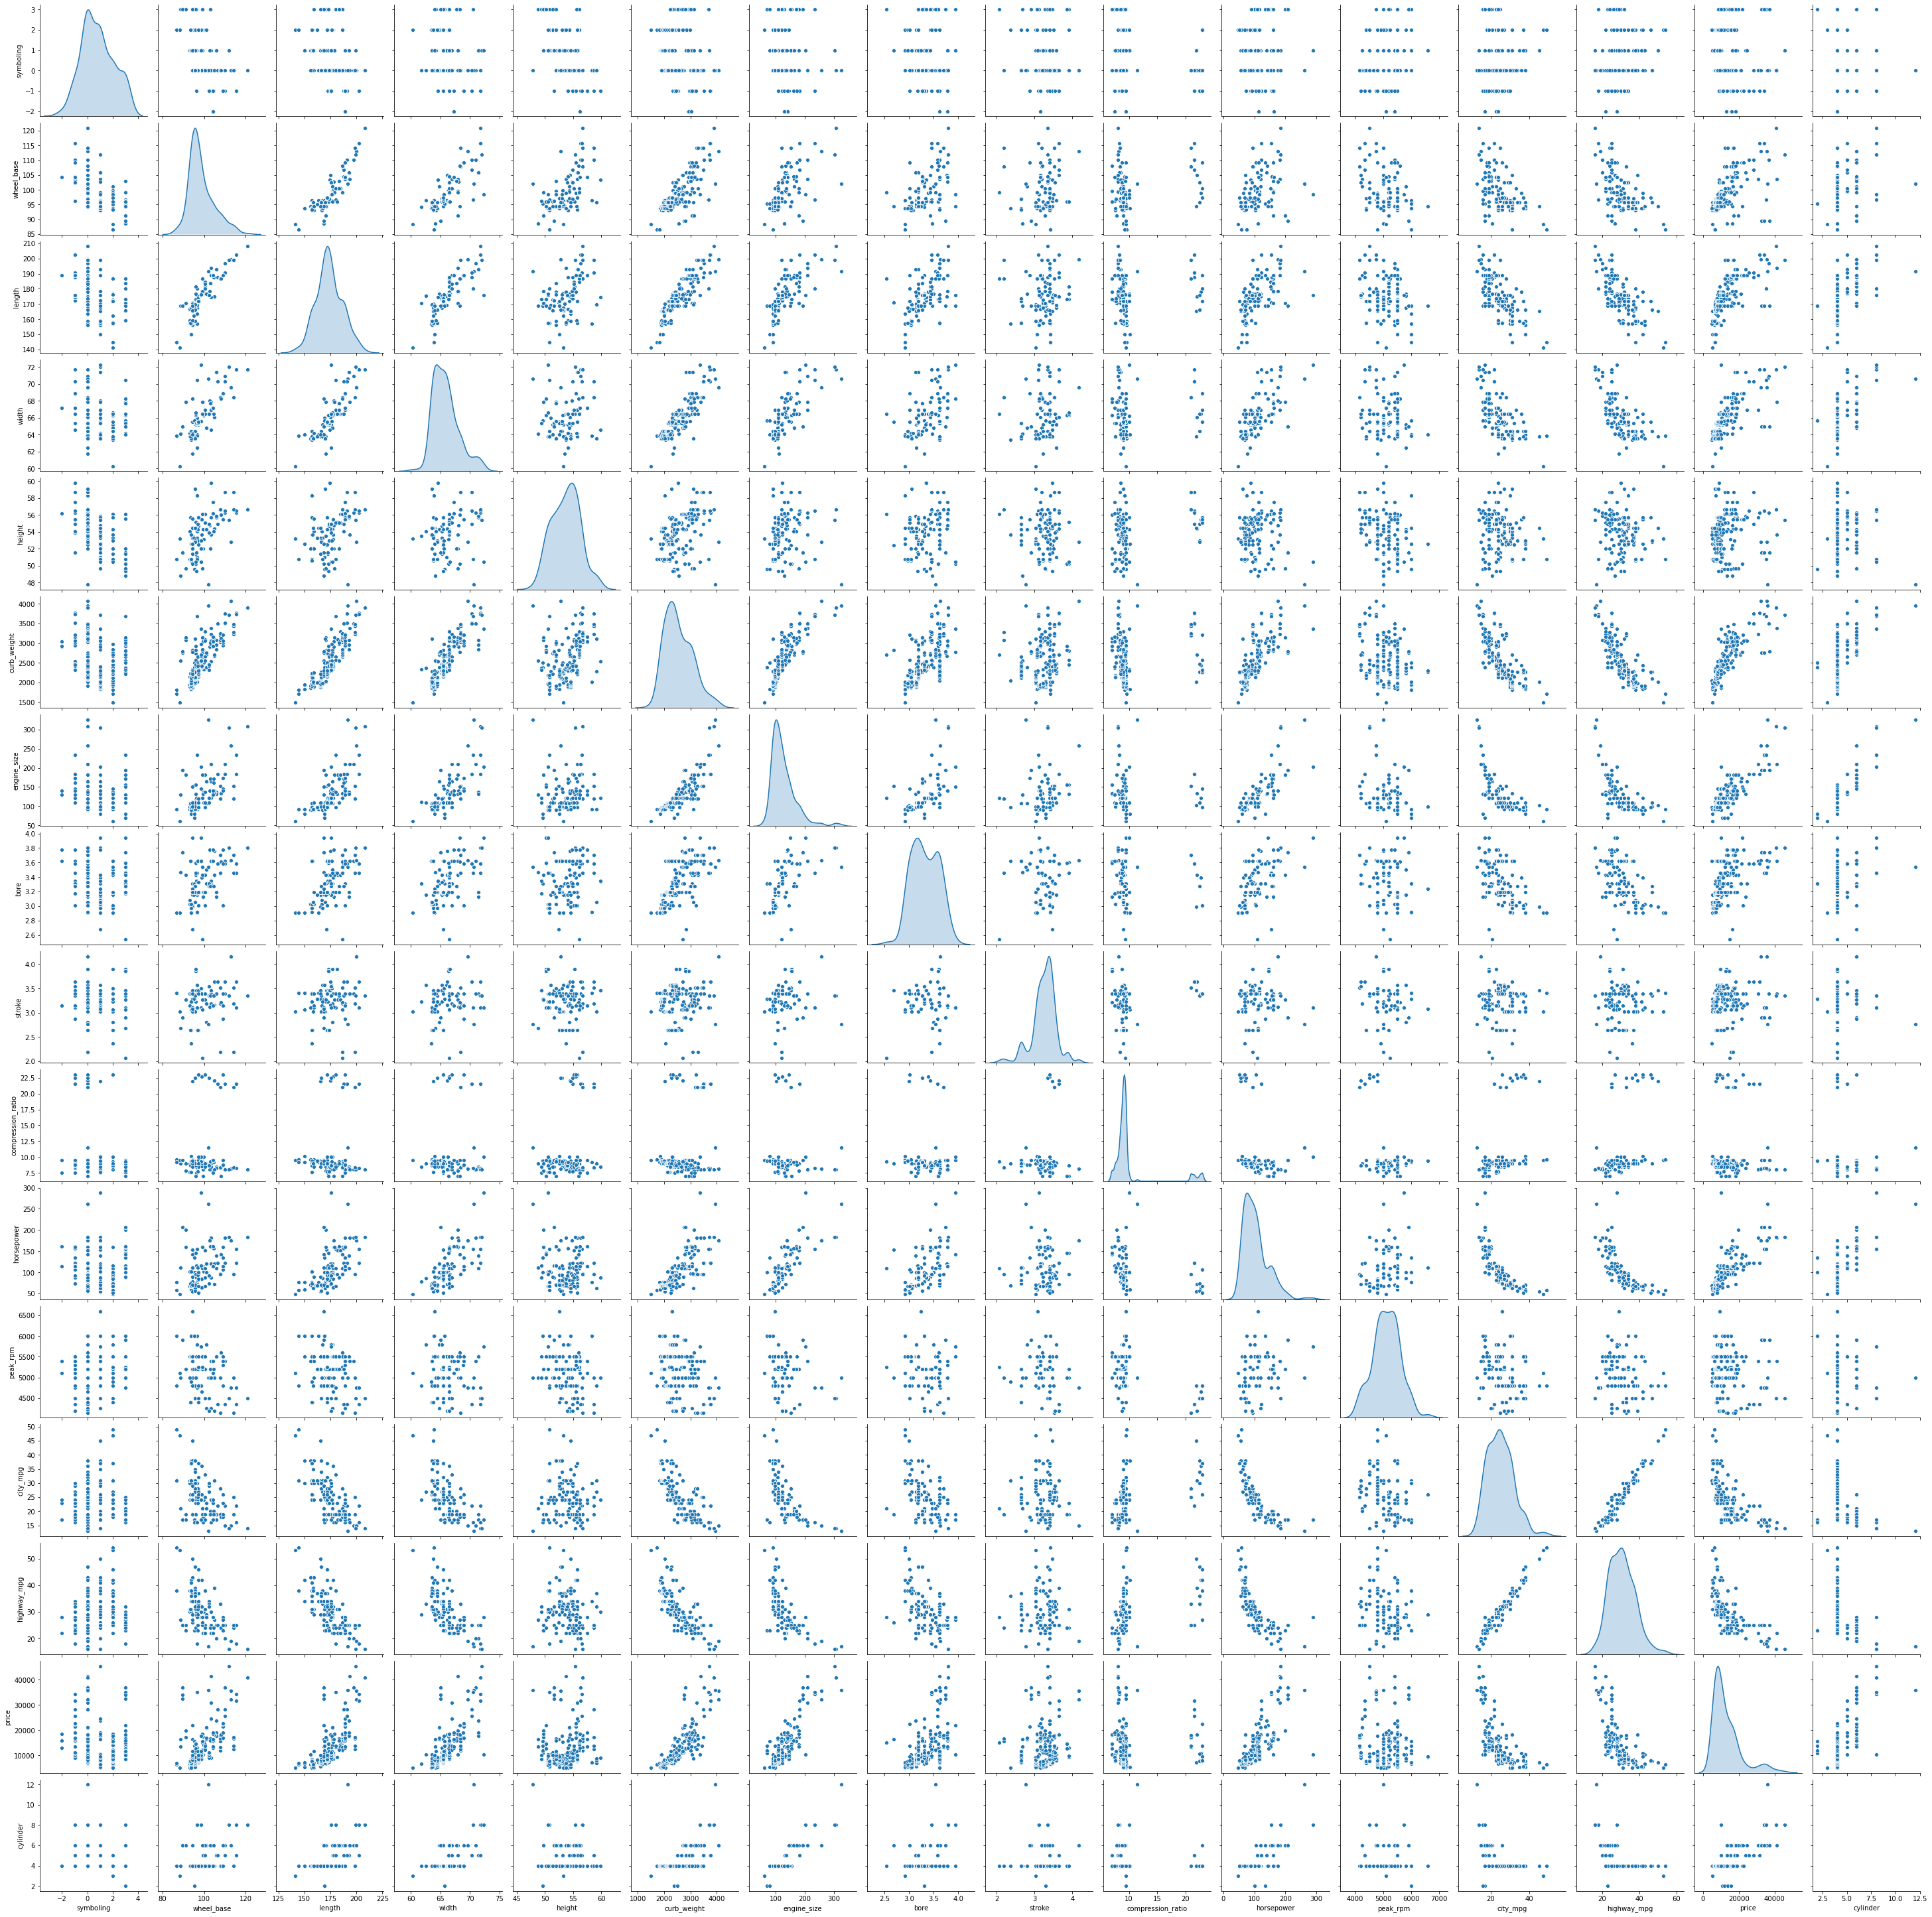

In [19]:
sns.pairplot(car_df, diag_kind = 'kde')

In [32]:
X = car_df.drop(['price', 'num_of_cylinders'],axis=1)
y = car_df[['price']]
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=1)

In [34]:
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [45]:
# for idx, col_name in enumerate(X_train.columns):
#     print(col_name, model.coef_[0][idx])
model.score(X_test,y_test)

0.8362176483290368

In [46]:
car_df

,symboling,wheel_base,length,width,height,curb_weight,num_of_cylinders,engine_size,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price,cylinder
0,3,88.6,168.8,64.1,48.8,2548,four,130,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0,4
1,3,88.6,168.8,64.1,48.8,2548,four,130,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0,4
2,1,94.5,171.2,65.5,52.4,2823,six,152,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0,6
3,2,99.8,176.6,66.2,54.3,2337,four,109,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0,4
4,2,99.4,176.6,66.4,54.3,2824,five,136,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,109.1,188.8,68.9,55.5,2952,four,141,3.78,3.15,9.5,114.0,5400.0,23,28,16845.0,4
201,-1,109.1,188.8,68.8,55.5,3049,four,141,3.78,3.15,8.7,160.0,5300.0,19,25,19045.0,4
202,-1,109.1,188.8,68.9,55.5,3012,six,173,3.58,2.87,8.8,134.0,5500.0,18,23,21485.0,6
203,-1,109.1,188.8,68.9,55.5,3217,six,145,3.01,3.40,23.0,106.0,4800.0,26,27,22470.0,6


In [43]:
model.predict([[3,88,168,64,48,2540,130,3,2,9,112,5000,20,30,6]])

array([[15087.41784094]])

In [47]:
import pickle
with open('model_pickle','wb') as f:
    pickle.dump(model,f)

In [49]:
with open('model_pickle','rb') as f:
    mdl = pickle.load(f)

In [50]:
mdl.predict([[3,88,168,64,48,2540,130,3,2,9,112,5000,20,30,6]])

array([[15087.41784094]])